# Stage 03: Python Fundamentals

## 1. NumPy Operations


In [1]:
import numpy as np
import time

arr = np.random.rand(1000000)

start_time = time.time()
result_loop = []
for i in range(len(arr)):
    result_loop.append(arr[i] * 2)
loop_time = time.time() - start_time

start_time = time.time()
result_vectorized = arr * 2
vectorized_time = time.time() - start_time

print(f"Loop time: {loop_time:.4f} seconds")
print(f"Vectorized time: {vectorized_time:.4f} seconds")


Loop time: 0.2268 seconds
Vectorized time: 0.0017 seconds


## 2. Dataset Loading


In [2]:
import pandas as pd

df = pd.read_csv('../data/HistoricalData.csv')
print(df.info())
print("\n")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 98.4+ KB
None


         Date  Close/Last      Open      High       Low
0  08/14/2025    21710.67  21649.21  21766.29  21627.13
1  08/13/2025    21713.14  21764.55  21803.75  21645.14
2  08/12/2025    21681.90  21507.44  21689.68  21386.25
3  08/11/2025    21385.40  21459.65  21549.73  21346.62
4  08/08/2025    21450.02  21316.37  21464.53  21284.97


## 3. Summary Statistics


In [8]:
print(df.describe())
print("\n")
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.rename(columns={'Close/Last': 'Close'}, inplace=True)
grouped = df.groupby('Year').agg({'Close': ['mean', 'min', 'max']})
print(grouped)


         Close/Last          Open          High           Low         Year
count   2517.000000   2517.000000   2517.000000   2517.000000  2517.000000
mean   10718.455737  10710.819710  10784.306544  10630.028713  2020.108065
std     4484.646077   4495.744077   4526.662353   4459.469325     2.915108
min     4266.840000      0.000000      0.000000      0.000000  2015.000000
25%     6963.850000   6959.630000   7025.850000   6903.390000  2018.000000
50%    10536.270000  10531.640000  10608.840000  10399.860000  2020.000000
75%    14047.500000  14045.210000  14141.070000  13952.800000  2023.000000
max    21713.140000  21764.550000  21803.750000  21645.140000  2025.000000


             Close                    
              mean       min       max
Year                                  
2015   4922.615556   4506.49   5156.31
2016   4987.792857   4266.84   5487.44
2017   6235.298884   5429.08   6994.76
2018   7425.957729   6192.92   8109.69
2019   7940.129325   6463.50   9022.39
2020  10201

## 4. Save Outputs


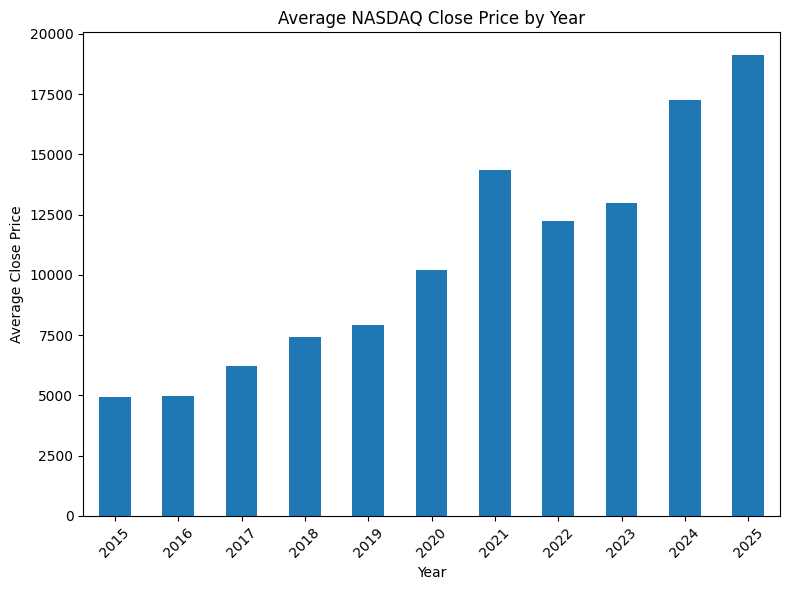

In [9]:
import os
import matplotlib.pyplot as plt

os.makedirs('../data/processed', exist_ok=True)

summary_stats = df.describe()
summary_stats.to_csv('../data/processed/summary.csv')

plt.figure(figsize=(8, 6))
df.groupby('Year')['Close'].mean().plot(kind='bar')
plt.title('Average NASDAQ Close Price by Year')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../data/processed/nasdaq_yearly_plot.png')
plt.show()


## 5. Reusable Functions


In [13]:
def get_summary_stats(df):
    return {
        'shape': df.shape,
        'columns': list(df.columns),
        'numeric_summary': df.describe(),
        'missing_values': df.isnull().sum()
    }

summary = get_summary_stats(df)
summary


{'shape': (2517, 6),
 'columns': ['Date', 'Close', 'Open', 'High', 'Low', 'Year'],
 'numeric_summary':               Close          Open          High           Low         Year
 count   2517.000000   2517.000000   2517.000000   2517.000000  2517.000000
 mean   10718.455737  10710.819710  10784.306544  10630.028713  2020.108065
 std     4484.646077   4495.744077   4526.662353   4459.469325     2.915108
 min     4266.840000      0.000000      0.000000      0.000000  2015.000000
 25%     6963.850000   6959.630000   7025.850000   6903.390000  2018.000000
 50%    10536.270000  10531.640000  10608.840000  10399.860000  2020.000000
 75%    14047.500000  14045.210000  14141.070000  13952.800000  2023.000000
 max    21713.140000  21764.550000  21803.750000  21645.140000  2025.000000,
 'missing_values': Date     0
 Close    0
 Open     0
 High     0
 Low      0
 Year     0
 dtype: int64}